<a href="https://colab.research.google.com/github/Osanda-W/Telco_Customer_churn/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Analysis**


In [61]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, f1_score,auc
from sklearn import tree



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [3]:
# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


In [5]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convert TotalCharges to numeric
# 'TotalCharges' is object type but contains numbers. Force conversion.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Check for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
df_copy=df.copy()
df_copy[df_copy.TotalCharges.isnull()==True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
#Impute missing TotalCharges
df['TotalCharges'].fillna(0, inplace=True)

In [10]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
# Summary statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
# Get unique values
df.apply(lambda x: x.unique())

,0
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"


In [13]:
# Drop rows with missing values
df = df.dropna()

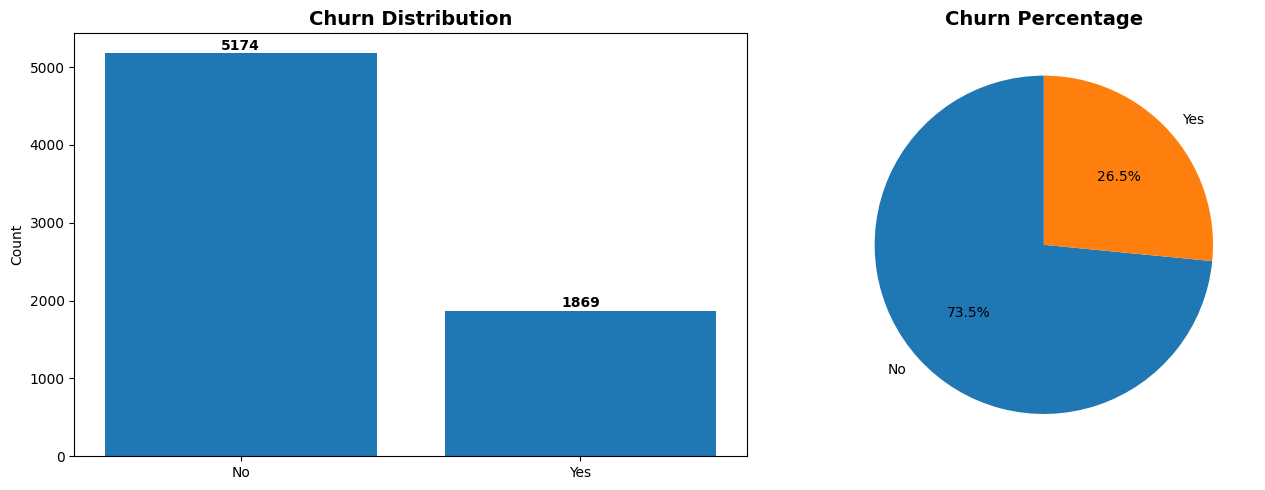

In [14]:
# Churn Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values)
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            startangle=90)
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Numerical Features Analysis**

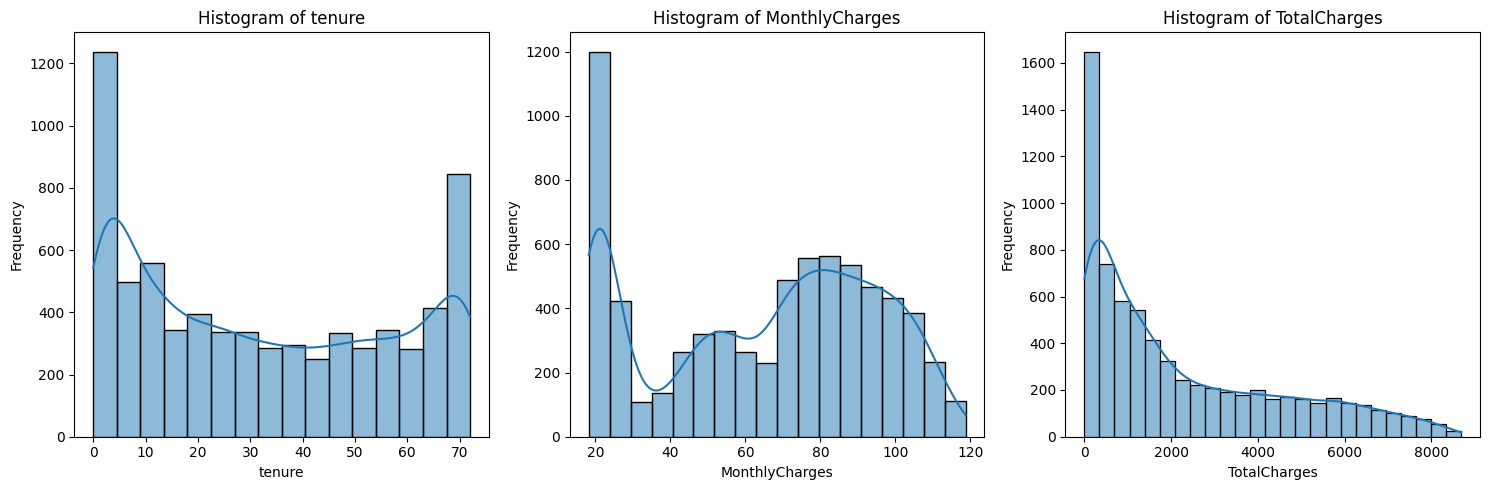

In [15]:
# Histograms for numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Categorical Features Analysis**

In [ ]:
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

In [ ]:
plt.figure(figsize=(18, 40))

for i, col in enumerate(cat_features, 1):
    plt.subplot(6, 4, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} by Churn', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

plt.tight_layout(pad=4.0)
plt.show()

**Boxplots for numerical features vs Churn**

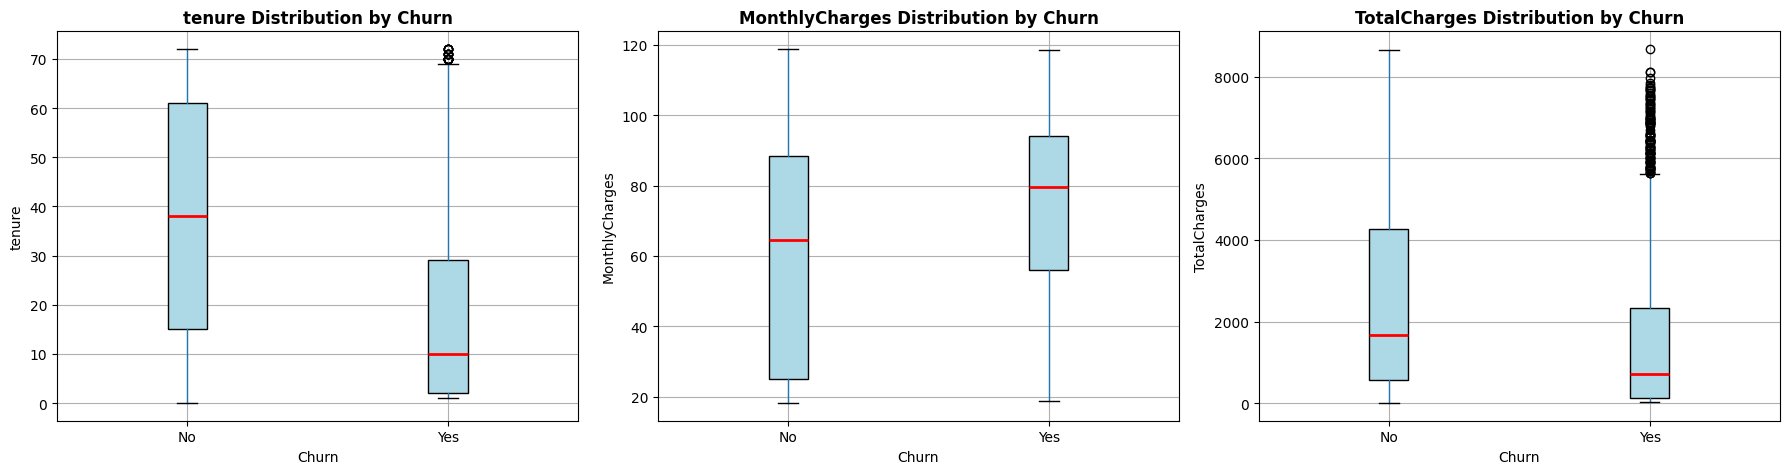


Insights:
- Churned customers have lower tenure (shorter relationship)
- Churned customers have higher monthly charges
- Churned customers have lower total charges


In [16]:
# Boxplots for numerical features vs Churn

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    df.boxplot(column=col, by='Churn', ax=axes[idx], patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')

plt.suptitle('')
plt.tight_layout()
plt.show()

print("\nInsights:")
print("- Churned customers have lower tenure (shorter relationship)")
print("- Churned customers have higher monthly charges")
print("- Churned customers have lower total charges")

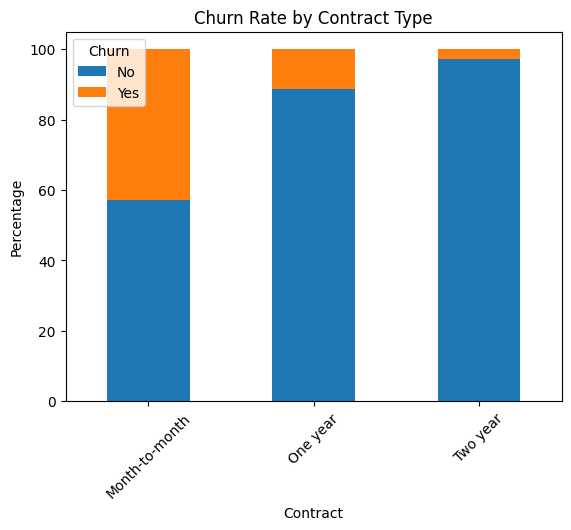

In [17]:
# Churn rate by Contract type (percentage)
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


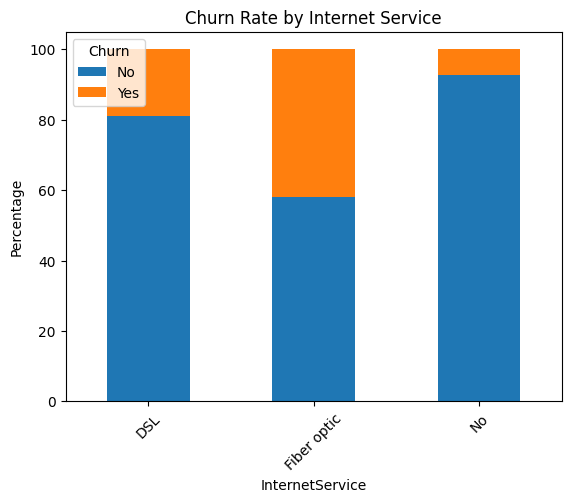

In [18]:
# Churn rate by InternetService
churn_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_internet.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.pairplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],hue="Churn")

<Axes: >

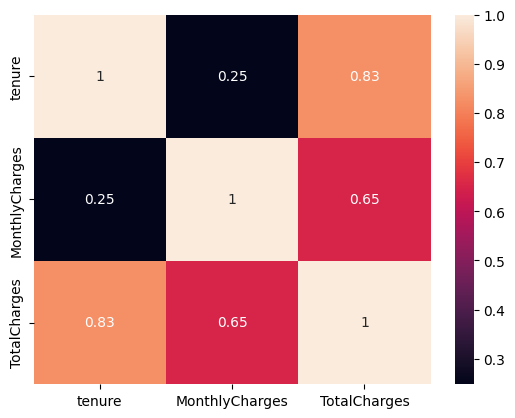

In [19]:
#Correlation Heatmap
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True)


# **Data Preprocessing**

In [20]:
# Convert TotalCharges to numeric
# 'TotalCharges' is object type but contains numbers. Force conversion.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [21]:
# Fill null values created by coercion with the mean
# df['TotalCharges'].fillna(0, inplace=True)
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [22]:
# Drop irrelevant column
df.drop(columns=['customerID'], inplace=True)

In [23]:
# Encoding Target Variable
# Convert 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head(3)

# **Feature Engineering & Encoding**

In [24]:

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [25]:
# One-Hot Encoding for categorical features (drop_first to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [26]:
df_encoded.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [27]:
# Splitting Data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Scaling (Crucial for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Testing Features Shape: {X_test_scaled.shape}")

Training Features Shape: (5634, 30)
Testing Features Shape: (1409, 30)


In [29]:
# Class weights (important for churn ~26.5% positive)
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


In [30]:
# SMORT use for handle classs imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [31]:
X_train_res.shape

(8278, 30)

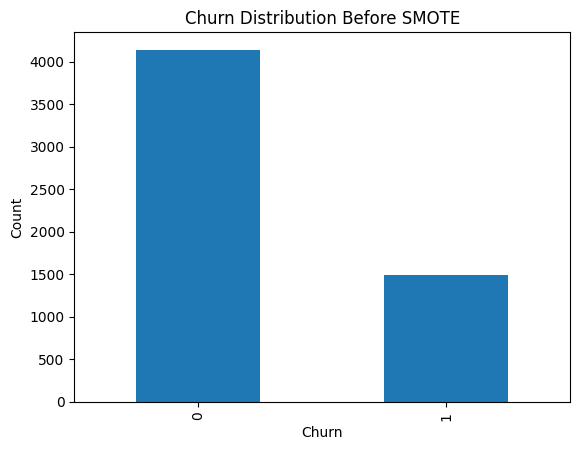

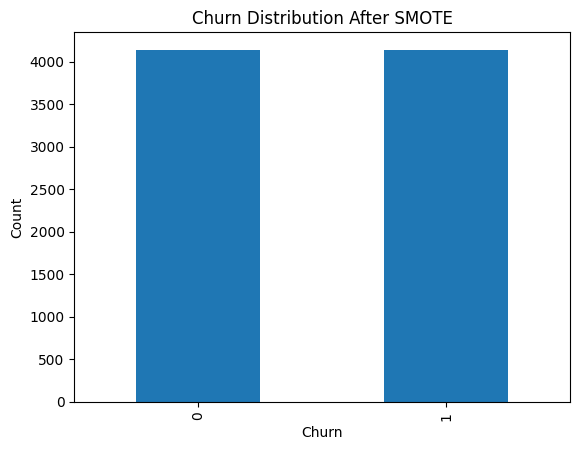

In [32]:
y_train.value_counts().plot(kind='bar')
plt.title("Churn Distribution Before SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

y_train_res.value_counts().plot(kind='bar')
plt.title("Churn Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

**Decision Tree Base**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

In [ ]:
prediction_test = dt.predict(X_test_scaled)
accuracy_score(y_test, prediction_test)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

# **Decision Tree Model (with Hyperparameter Tuning)**

In [36]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, 12, None],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}


In [37]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='f1', # Primary optimization metric
                           n_jobs=-1, # Parallel computation
                           verbose=1 # Search progress tracking
                           )

grid_search.fit(X_train_scaled, y_train)

# Get best model
best_dt_model = grid_search.best_estimator_

# Predictions
y_pred_dt = best_dt_model.predict(X_test_scaled)
y_prob_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]

print(f"Best Decision Tree Params: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [38]:
test_accuracy = best_dt_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7345635202271115


In [39]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Accuracy: 0.7991 (79.91%)


[Text(0.58, 0.9, 'Contract_Two year <= 0.605\nentropy = 0.835\nsamples = 5634\nvalue = [4139, 1495]\nclass = No Churn'),
 Text(0.32, 0.7, 'Contract_One year <= 0.719\nentropy = 0.925\nsamples = 4275\nvalue = [2819, 1456]\nclass = No Churn'),
 Text(0.44999999999999996, 0.8, 'True  '),
 Text(0.16, 0.5, 'InternetService_Fiber optic <= 0.119\nentropy = 0.985\nsamples = 3102\nvalue = [1776, 1326]\nclass = No Churn'),
 Text(0.08, 0.3, 'tenure <= -1.18\nentropy = 0.851\nsamples = 1395\nvalue = [1009, 386]\nclass = No Churn'),
 Text(0.04, 0.1, '\n  (...)  \n'),
 Text(0.12, 0.1, '\n  (...)  \n'),
 Text(0.24, 0.3, 'tenure <= -0.773\nentropy = 0.993\nsamples = 1707\nvalue = [767, 940]\nclass = Churn'),
 Text(0.2, 0.1, '\n  (...)  \n'),
 Text(0.28, 0.1, '\n  (...)  \n'),
 Text(0.48, 0.5, 'StreamingMovies_Yes <= 0.223\nentropy = 0.502\nsamples = 1173\nvalue = [1043, 130]\nclass = No Churn'),
 Text(0.4, 0.3, 'PaymentMethod_Electronic check <= 0.348\nentropy = 0.272\nsamples = 644\nvalue = [614, 30]\

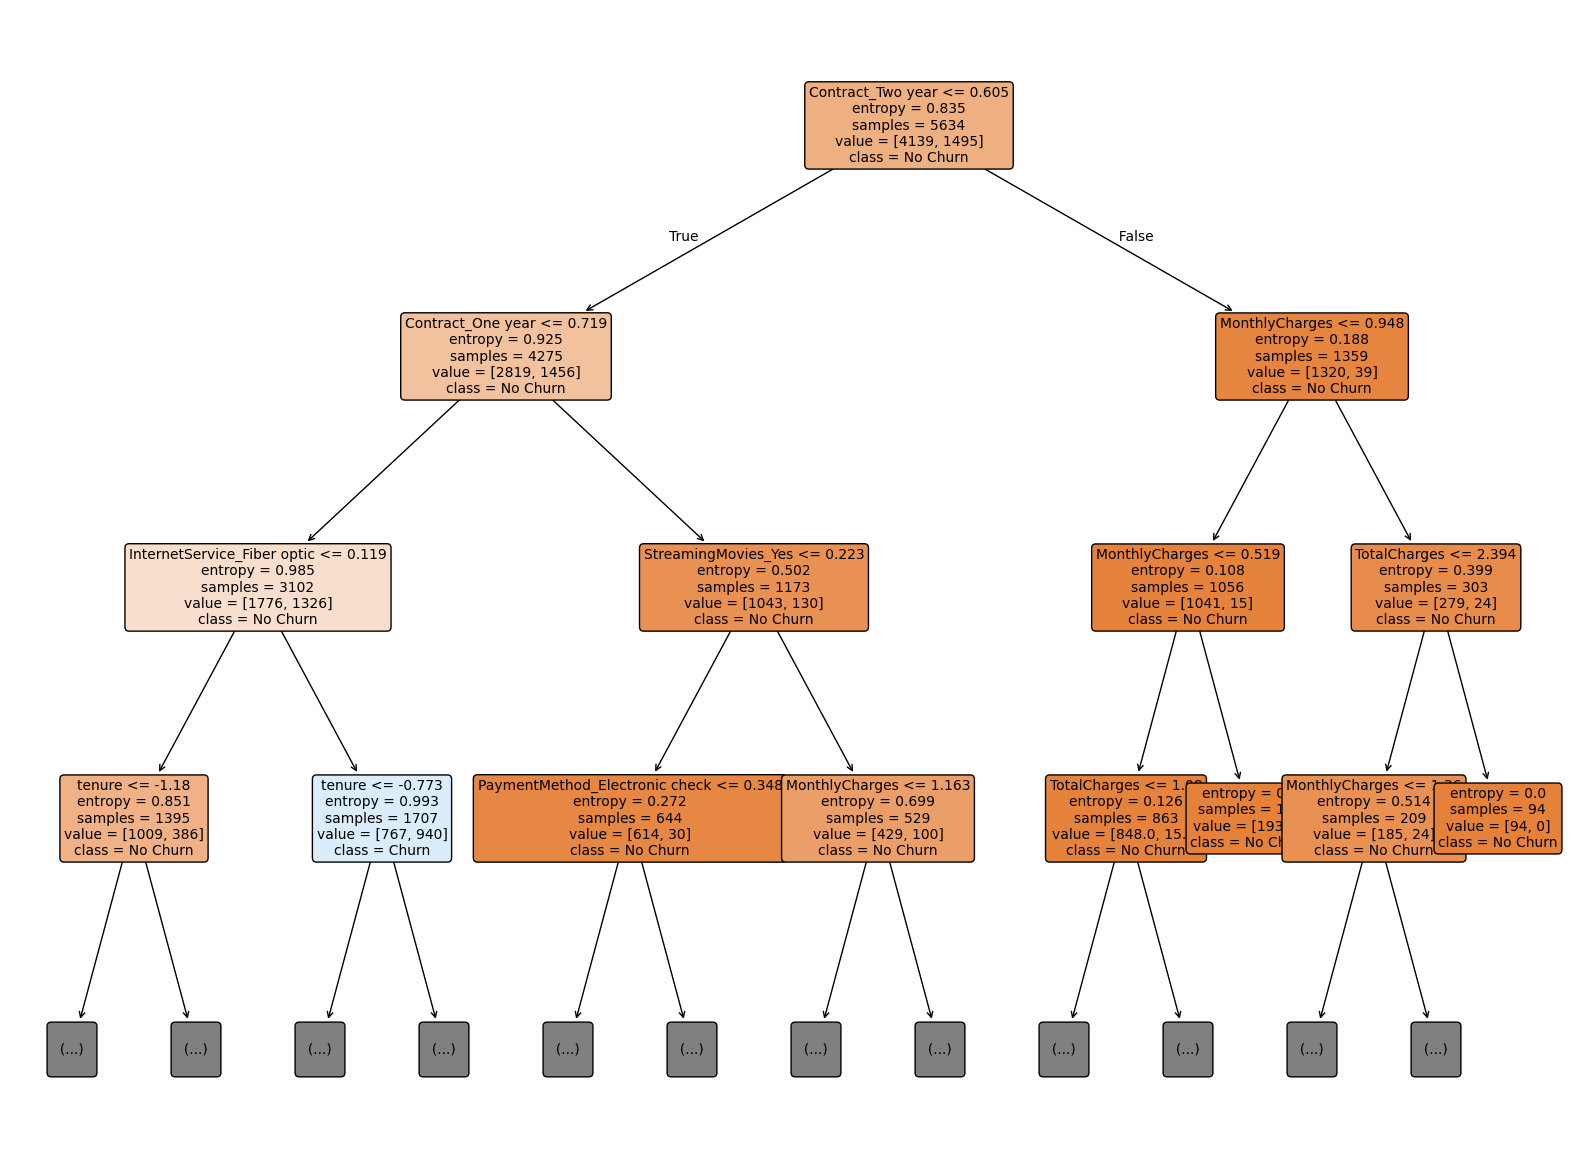

In [45]:
#plot decision tree
plt.figure(figsize = (20,15))
tree.plot_tree(best_dt_model,
               feature_names = list(X_train.columns),
               class_names=['No Churn', 'Churn'],
               filled = True,
               rounded=True,
               fontsize=10,
               max_depth=3)

In [41]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} Results ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC-AUC Score: {auc:.4f} ({auc*100:.2f}%)")


    # Return metrics for table
    acc = accuracy_score(y_true, y_pred)
    return acc, auc

# Print Reports
acc_dt, auc_dt = evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)

--- Decision Tree Results ---
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.63      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409

ROC-AUC Score: 0.8295 (82.95%)


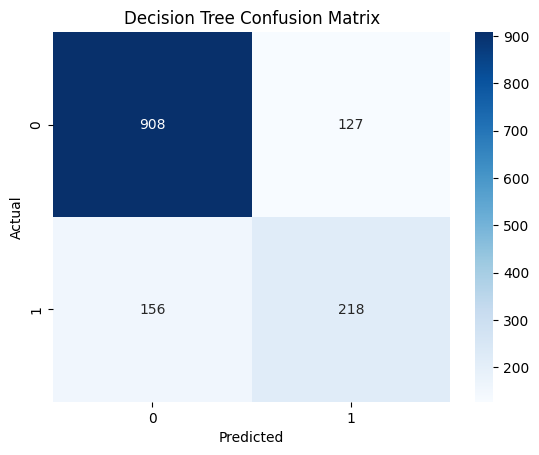

In [42]:
# Visualization: Decision Tree Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

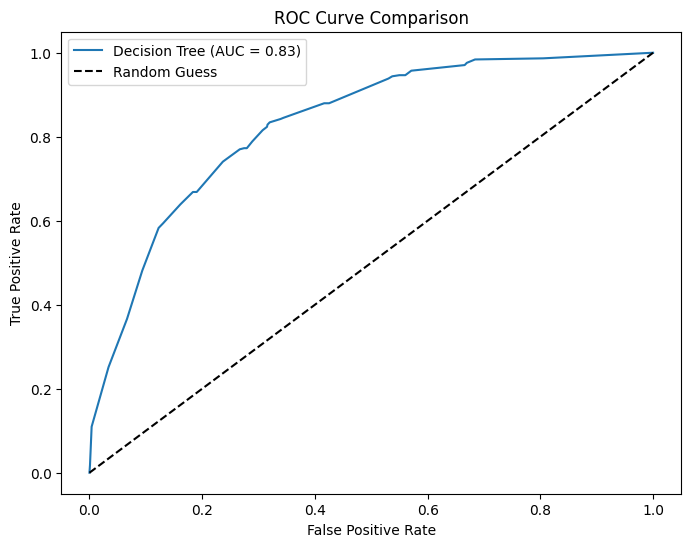

In [43]:
# Visualization: ROC Curve Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# **Neural Network Model**

In [46]:
# Define the Neural Network Architecture

# Input Layer + Hidden Layer 1
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dropout(0.2)) # Regularization

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer 3
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

In [47]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Train Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7413 - loss: 0.5164 - val_accuracy: 0.7808 - val_loss: 0.4516
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 0.4268 - val_accuracy: 0.7764 - val_loss: 0.4499
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8009 - loss: 0.4293 - val_accuracy: 0.7862 - val_loss: 0.4434
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8018 - loss: 0.4330 - val_accuracy: 0.7888 - val_loss: 0.4393
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8071 - loss: 0.4170 - val_accuracy: 0.7897 - val_loss: 0.4391
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8002 - loss: 0.4311 - val_accuracy: 0.7835 - val_loss: 0.4434
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.3961 - val_accuracy: 0.7844 - val_loss: 0.4397
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8051 - loss: 0.4197 - val_accu

In [50]:
# Predictions
y_prob_nn = model.predict(X_test_scaled).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int) # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7892 (78.92%)


In [51]:
#Evaluate the model
loss,accuracy=model.evaluate(X_test,y_test)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 130.0095
Test Loss:  137.24835205078125
Test Accuracy:  0.7345635294914246
Test Accuracy: 0.7346 (73.46%)


In [52]:
# Check for overfitting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

Final Training Loss: 0.3842
Final Validation Loss: 0.4463
Final Training Accuracy: 0.8234
Final Validation Accuracy: 0.7950


In [53]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} Results ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC-AUC Score: {auc:.4f} ({auc*100:.2f}%)")


    # Return metrics for table
    acc = accuracy_score(y_true, y_pred)
    return acc, auc

In [54]:
# Print Reports

acc_nn, auc_nn = evaluate_model("Neural Network", y_test, y_pred_nn, y_prob_nn)

--- Neural Network Results ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8388 (83.88%)


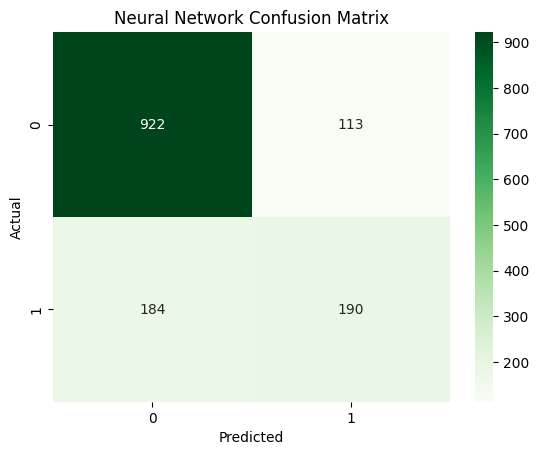

In [55]:
# Visualization: Neural Network Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

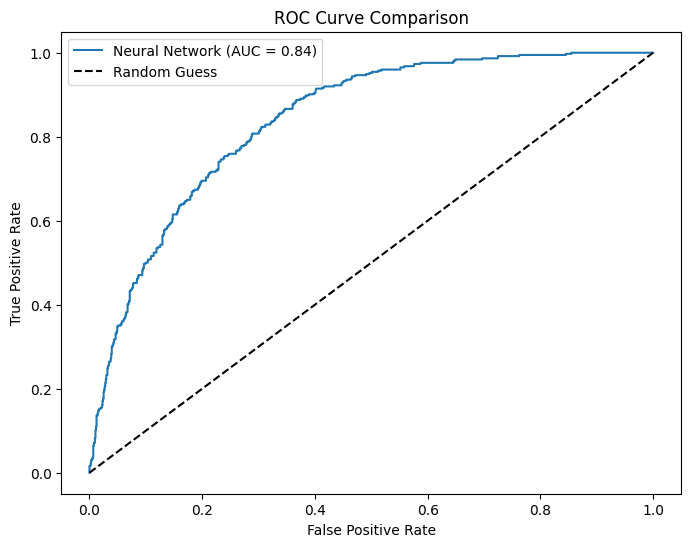

In [59]:
# Visualization: ROC Curve Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()




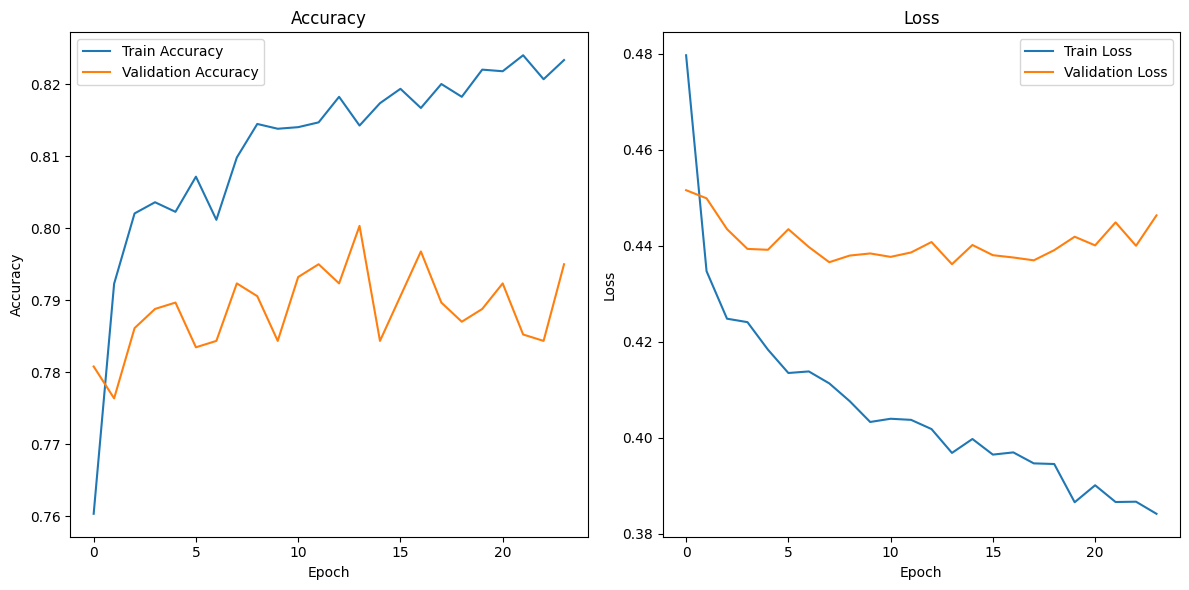

In [58]:
plt.figure(figsize=(12, 6))

#Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

**Final Comparison**

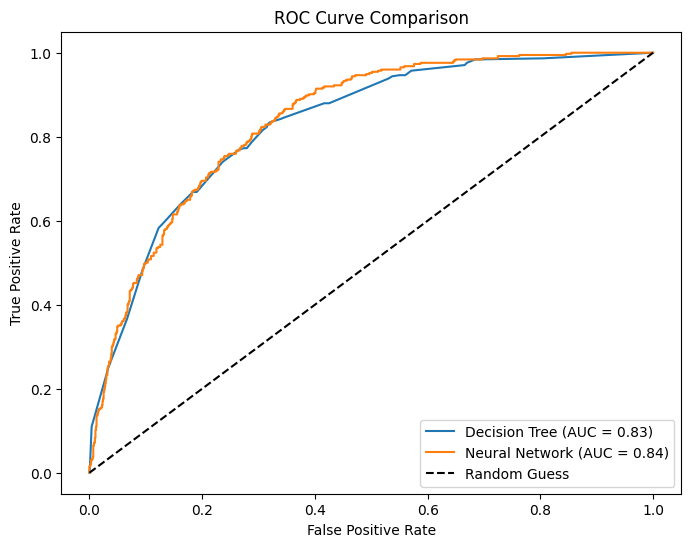

In [64]:
# Visualization: ROC Curve Comparison
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [65]:
# Final Comparison Table
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network'],
    'Accuracy': [acc_dt, acc_nn],
    'Accuracy (%)': [acc_dt*100, acc_nn*100],
    'ROC-AUC': [auc_dt, auc_nn],
    'ROC-AUC (%)': [auc_dt*100, auc_nn*100]
})
print("Final Comparison Summary:")
print(results_df)

Final Comparison Summary:
            Model  Accuracy  Accuracy (%)   ROC-AUC  ROC-AUC (%)
0   Decision Tree  0.799148     79.914833  0.829549    82.954868
1  Neural Network  0.789212     78.921221  0.838831    83.883076
